In [1]:
## Importieren der benötigt Bibliotheken
import pandas as pd
import numpy as np

import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import division
from pandas import DataFrame, Series
from scipy import stats

%matplotlib inline

/home/alex/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
## Datei kann unter folgender URL runtergeladen werden

url = 'http://www.wahlergebnisse.nrw.de/landtagswahlen/2012/txtdateien/a136lw1200.txt'

## Importieren des Datensatzes aus dem Arbeitsverzeichnis als DataFrame mit richtiger Codierung
##  Bei einem Blick in die Daten ist zur erkennen, dass Missings mit '-' codiert sind

wahlerg = pd.read_csv('../WahlergebisseNRW2012.csv', sep=';', encoding='Latin-1',
                      na_values='-')

In [3]:
## Dimension des Datensatzes anzeigen
wahlerg.shape

(129, 54)

In [4]:
## Die letzten 5 Fälle des Datensatzes
wahlerg.tail()

,Wahlkreisnr.,Wahlkreisname,Wahlberechtigte insgesamt,Wähler/-innen,Ungültige Stimmen Erststimmen,Ungültige Stimmen Zweitstimmen,Gültige Stimmen Erststimmen,Gültige Stimmen Zweitstimmen,CDU Erststimmen,CDU Zweitstimmen,...,BGD Erststimmen,BGD Zweitstimmen,BüSo Erststimmen,BüSo Zweitstimmen,LD Erststimmen,LD Zweitstimmen,RRP Erststimmen,RRP Zweitstimmen,Einzelbewerber / -innen Erststimmen,Einzelbewerber / -innen Zweitstimmen
124,124,Hochsauerlandkreis I,106591,65436,923,844,64513,64592,29034,24284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,125,Hochsauerlandkreis II,100400,61002,1093,1088,59909,59914,28315,23995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,126,Siegen-Wittgenstein I,112772,62405,949,870,61456,61535,21422,16411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,127,Siegen-Wittgenstein II,103721,62665,994,892,61671,61773,22917,18084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,128,Olpe,104327,62592,874,832,61718,61760,30965,26545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
wahlerg.head()

,Wahlkreisnr.,Wahlkreisname,Wahlberechtigte insgesamt,Wähler/-innen,Ungültige Stimmen Erststimmen,Ungültige Stimmen Zweitstimmen,Gültige Stimmen Erststimmen,Gültige Stimmen Zweitstimmen,CDU Erststimmen,CDU Zweitstimmen,...,BGD Erststimmen,BGD Zweitstimmen,BüSo Erststimmen,BüSo Zweitstimmen,LD Erststimmen,LD Zweitstimmen,RRP Erststimmen,RRP Zweitstimmen,Einzelbewerber / -innen Erststimmen,Einzelbewerber / -innen Zweitstimmen
0,0,Nordrhein-Westfalen,13262049,7901268,120658,107273,7780610,7793995,2545309,2050321,...,83.0,NaN,272.0,NaN,120.0,NaN,418.0,NaN,2605.0,NaN
1,1,Aachen I,86552,55999,693,568,55306,55431,17062,13179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Aachen II,91237,55563,891,788,54672,54775,18672,13644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347.0,NaN
3,3,Aachen III,116350,68241,1475,1372,66766,66869,21667,17864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aachen IV,111694,67326,1248,1257,66078,66069,23274,18690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
## Codebook für den Datensatz anzeigen
wahlerg.info()
## Okay die Variablen liegen in 24 Gleitkommazahlen, 29 Integer und einer Textvariable vor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 54 columns):
Wahlkreisnr.                            129 non-null int64
Wahlkreisname                           129 non-null object
Wahlberechtigte insgesamt               129 non-null int64
Wähler/-innen                           129 non-null int64
Ungültige Stimmen Erststimmen           129 non-null int64
Ungültige Stimmen Zweitstimmen          129 non-null int64
Gültige Stimmen Erststimmen             129 non-null int64
Gültige Stimmen Zweitstimmen            129 non-null int64
CDU Erststimmen                         129 non-null int64
CDU Zweitstimmen                        129 non-null int64
SPD Erststimmen                         129 non-null int64
SPD Zweitstimmen                        129 non-null int64
GRÜNE Erststimmen                       129 non-null int64
GRÜNE Zweitstimmen                      129 non-null int64
FDP Erststimmen                         129 non-null int64
FDP Zweit

In [146]:
## Anzeigen der erhaltenen Stimmen der Parteien
## Zeile 0 enthält bereits alle notwendigen summen
## Und wird daher bei der Summierung nicht berücksichtigt
wahlerg.ix[1:, 2 : wahlerg.shape[1]-1].sum()

Wahlberechtigte insgesamt              13262049.0
Wähler/-innen                           7901268.0
Ungültige Stimmen Erststimmen            120658.0
Ungültige Stimmen Zweitstimmen           107273.0
Gültige Stimmen Erststimmen             7780610.0
Gültige Stimmen Zweitstimmen            7793995.0
CDU Erststimmen                         2545309.0
CDU Zweitstimmen                        2050321.0
SPD Erststimmen                         3290561.0
SPD Zweitstimmen                        3049983.0
GRÜNE Erststimmen                        723581.0
GRÜNE Zweitstimmen                       884298.0
FDP Erststimmen                          372727.0
FDP Zweitstimmen                         670082.0
DIE LINKE Erststimmen                    201637.0
DIE LINKE Zweitstimmen                   194428.0
PIRATEN Erststimmen                      617926.0
PIRATEN Zweitstimmen                     609176.0
pro NRW Erststimmen                           0.0
pro NRW Zweitstimmen                     118326.0


In [147]:
## Tabellieren der fehlenden Werte in Variable 2 und 3
pd.isnull(wahlerg.ix[:,2]).value_counts()
pd.isnull(wahlerg.ix[:,3]).value_counts()
## In der Variablen liegen keine Missings vor

False    129
Name: Wähler/-innen, dtype: int64

In [148]:
## Nun kann aus Variable 'Wähler/-innen' und 
## 'Wahlberechtigte Insgesamt' die 'Wahlbeteiligung ermittelt werden

In [149]:
wahlerg.head()

,Wahlkreisnr.,Wahlkreisname,Wahlberechtigte insgesamt,Wähler/-innen,Ungültige Stimmen Erststimmen,Ungültige Stimmen Zweitstimmen,Gültige Stimmen Erststimmen,Gültige Stimmen Zweitstimmen,CDU Erststimmen,CDU Zweitstimmen,...,BGD Erststimmen,BGD Zweitstimmen,BüSo Erststimmen,BüSo Zweitstimmen,LD Erststimmen,LD Zweitstimmen,RRP Erststimmen,RRP Zweitstimmen,Einzelbewerber / -innen Erststimmen,Einzelbewerber / -innen Zweitstimmen
0,0,Nordrhein-Westfalen,13262049,7901268,120658,107273,7780610,7793995,2545309,2050321,...,83.0,NaN,272.0,NaN,120.0,NaN,418.0,NaN,2605.0,NaN
1,1,Aachen I,86552,55999,693,568,55306,55431,17062,13179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Aachen II,91237,55563,891,788,54672,54775,18672,13644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347.0,NaN
3,3,Aachen III,116350,68241,1475,1372,66766,66869,21667,17864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aachen IV,111694,67326,1248,1257,66078,66069,23274,18690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
len(wahlerg)

129

In [152]:
## By Python startet der Index bei 0, so dass der Index auf 128 endet

In [153]:
wahlerg.tail()

,Wahlkreisnr.,Wahlkreisname,Wahlberechtigte insgesamt,Wähler/-innen,Ungültige Stimmen Erststimmen,Ungültige Stimmen Zweitstimmen,Gültige Stimmen Erststimmen,Gültige Stimmen Zweitstimmen,CDU Erststimmen,CDU Zweitstimmen,...,BGD Erststimmen,BGD Zweitstimmen,BüSo Erststimmen,BüSo Zweitstimmen,LD Erststimmen,LD Zweitstimmen,RRP Erststimmen,RRP Zweitstimmen,Einzelbewerber / -innen Erststimmen,Einzelbewerber / -innen Zweitstimmen
124,124,Hochsauerlandkreis I,106591,65436,923,844,64513,64592,29034,24284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,125,Hochsauerlandkreis II,100400,61002,1093,1088,59909,59914,28315,23995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,126,Siegen-Wittgenstein I,112772,62405,949,870,61456,61535,21422,16411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,127,Siegen-Wittgenstein II,103721,62665,994,892,61671,61773,22917,18084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,128,Olpe,104327,62592,874,832,61718,61760,30965,26545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
## Erzeugen der Variablen "Wahlbeteiligung" 
wahlerg['wahlbet'] = pd.concat([wahlerg.ix[:,3]/wahlerg.ix[:,2]])

In [56]:
## Zusammenfassung der Wahlbeteilung OHNE den ersten Fall des Datensatzes
wahlerg.ix[1:(len(wahlerg)-1),'wahlbet'].describe()

count    128.000000
mean       0.593875
std        0.040993
min        0.454883
25%        0.570618
50%        0.596961
75%        0.618818
max        0.696884
Name: wahlbet, dtype: float64

In [168]:
## Zusammenfassung der Wahlbeteilung OHNE den ersten Fall des Datensatzes
wahlerg.ix[1:(len(wahlerg)-1),'wahlbet'].describe()

count    128.000000
mean       0.593875
std        0.040993
min        0.454883
25%        0.570618
50%        0.596961
75%        0.618818
max        0.696884
Name: wahlbet, dtype: float64

In [63]:
## Zusammenfassen der Wahlkreise  zu den Städten bzw. Landkreisen mit Regulären Ausdrücken
wahlerg['WahlkreisKomp'] = wahlerg['Wahlkreisname'].str.replace('\s.*$', '')
## Wie sehen die Ersten zehn Einträge der Variablen aus
wahlerg.ix[1:10, wahlerg.shape[1]-1 ]

1               Aachen
2               Aachen
3               Aachen
4               Aachen
5     Rhein-Erft-Kreis
6     Rhein-Erft-Kreis
7     Rhein-Erft-Kreis
8           Euskirchen
9            Heinsberg
10           Heinsberg
Name: WahlkreisKomp, dtype: object

In [64]:
## Die Verdichtung scheint funktioniert zu haben

In [172]:
## Wie viele Wahlkreise sind in den einzelnen Städten integriert
wahlerg['WahlkreisKomp'].value_counts()
## In Köln liegen die meisten Wahlkreise vor

Köln                    7
Recklinghausen          5
Essen                   4
Aachen                  4
Dortmund                4
Düsseldorf              4
Duisburg                4
Mettmann                4
Rhein-Sieg-Kreis        4
Märkischer              3
Gütersloh               3
Steinfurt               3
Rhein-Erft-Kreis        3
Wuppertal               3
Unna                    3
Wesel                   3
Lippe                   3
Rhein-Kreis             3
Bochum                  3
Bielefeld               2
Siegen-Wittgenstein     2
Hochsauerlandkreis      2
Warendorf               2
Kleve                   2
Coesfeld                2
Heinsberg               2
Viersen                 2
Borken                  2
Oberbergischer          2
Mönchengladbach         2
Krefeld                 2
Soest                   2
Rheinisch-Bergischer    2
Bonn                    2
Oberhausen              2
Düren                   2
Hagen                   2
Ennepe-Ruhr-Kreis       2
Münster     

In [68]:
## Wie sieht die verdichtete Wahlbeteiligung der Städte aus
## Die Daten werden dafür nach Städten gruppiert

wahlbetStadt = wahlerg['wahlbet'].groupby(wahlerg['WahlkreisKomp'])

In [71]:
## Ermitteln der Wahlbeteiligung
wahldurchStadt = wahlbetStadt.mean()
wahldurchStadt
## Festzuhalten ist dass die Wahlbeteiligung nirgendwo unter 50 % liegt

WahlkreisKomp
Aachen                  0.611320
Bielefeld               0.602010
Bochum                  0.605406
Bonn                    0.653464
Borken                  0.609564
Bottrop                 0.602820
Coesfeld                0.658764
Dortmund                0.556100
Duisburg                0.524119
Düren                   0.599983
Düsseldorf              0.606614
Ennepe-Ruhr-Kreis       0.619235
Essen                   0.582586
Euskirchen              0.578066
Gelsenkirchen           0.522237
Gütersloh               0.609542
Hagen                   0.563664
Hamm                    0.583064
Heinsberg               0.573465
Herford                 0.578858
Herne                   0.551327
Hochsauerlandkreis      0.610744
Höxter                  0.598369
Kleve                   0.592630
Krefeld                 0.565598
Köln                    0.589677
Leverkusen              0.577889
Lippe                   0.602173
Mettmann                0.619251
Minden-Lübbecke         0.557

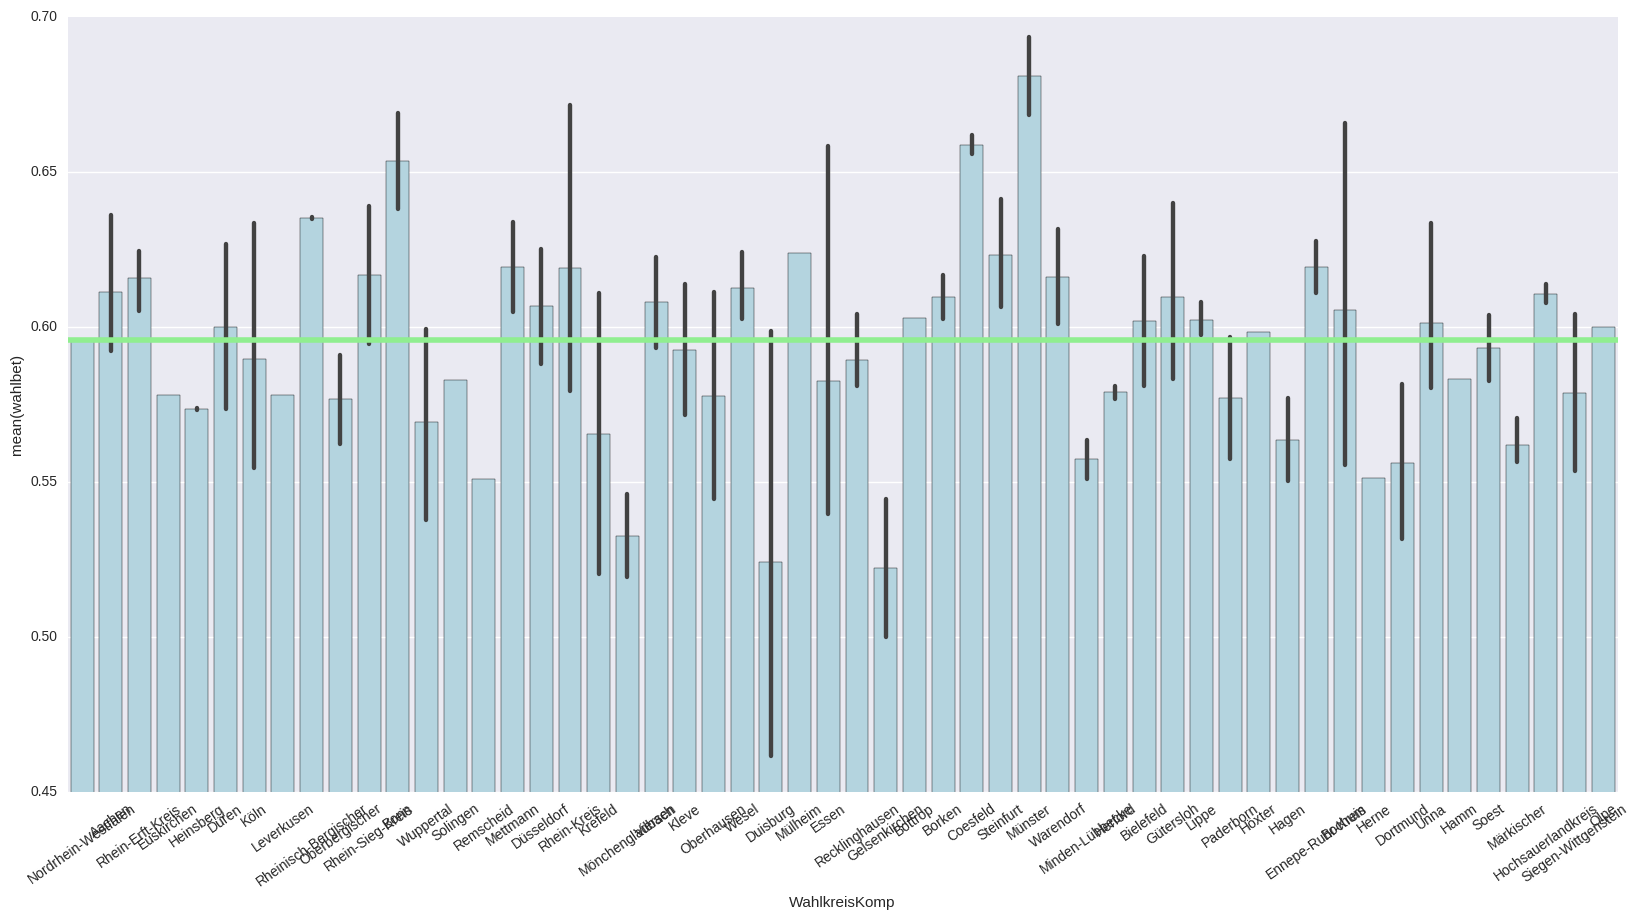

In [119]:
## Okay das scheint ein wenig unübersichtlich zu sein
## Deshalb wird das Ergebnis in einem Balkendiagramm dargestellt
plt.figure(figsize=(20, 10))
sns.barplot(x='WahlkreisKomp', y='wahlbet', data=wahlerg, color='lightblue')
plt.xticks(rotation=35)
plt.ylim(.45,.7)

## durchschnitt als Linie
## NRW wert liegt bereits als Variable vor
plt.axhline(y=wahlerg.ix[0, 'wahlbet'], linewidth=4, color='lightgreen')

In [118]:
## Die Daten deuten darauf hin, dass in wirtschaftlich starken Regionen
## die Wahlbeteiligung in der Regel höher ausfällt

In [ ]:
## Die Erwebstätigkeit gemessen durch die Arbeitslosenstatistik
## könnte als Indikator funktionieren